## Feature Imputation with a Heat Flux Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv',low_memory = False)
data.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31644 entries, 0 to 31643
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   31644 non-null  int64  
 1   author               26620 non-null  object 
 2   geometry             26144 non-null  object 
 3   pressure [MPa]       27192 non-null  float64
 4   mass_flux [kg/m2-s]  26853 non-null  float64
 5   x_e_out [-]          21229 non-null  float64
 6   D_e [mm]             26156 non-null  float64
 7   D_h [mm]             27055 non-null  float64
 8   length [mm]          26885 non-null  float64
 9   chf_exp [MW/m2]      31644 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.4+ MB


In [4]:
data.isna().sum()

id                         0
author                  5024
geometry                5500
pressure [MPa]          4452
mass_flux [kg/m2-s]     4791
x_e_out [-]            10415
D_e [mm]                5488
D_h [mm]                4589
length [mm]             4759
chf_exp [MW/m2]            0
dtype: int64

In [5]:
original = pd.read_csv('Data_CHF_Zhao_2020_ATE.csv')
original.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,1,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,2,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,3,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,4,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,5,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0


In [6]:
submission = pd.read_csv('sample_submission_2.csv')
submission.head()

,id,x_e_out [-]
0,4,0.0
1,7,0.0
2,10,0.0
3,12,0.0
4,23,0.0


In [7]:
print('The dimension of the synthetic dataset is:', data.shape)
print('The dimension of the orginal dataset is:', original.shape)
print('The dimension of the submission dataset is:', submission.shape)

The dimension of the synthetic dataset is: (31644, 10)
The dimension of the orginal dataset is: (1865, 10)
The dimension of the submission dataset is: (10415, 2)


### Visualize the dataset

Text(0.5, 1.0, 'Original dataset')

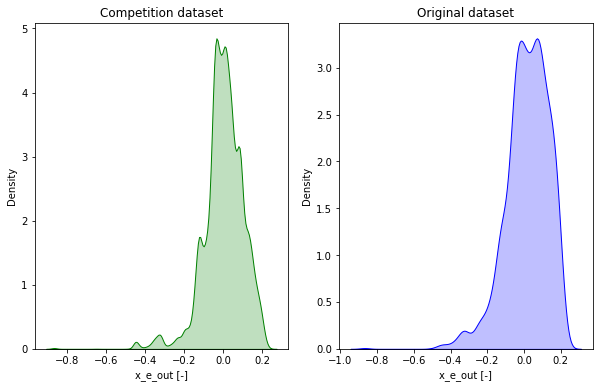

In [8]:
fig , axes = plt.subplots(1 , 2 , figsize = (10,6))
sns.kdeplot(ax = axes[0],  data = data , x = 'x_e_out [-]' , color = 'green',shade = True).set_title('Competition dataset')
sns.kdeplot(ax = axes[1] , data = original , x = 'x_e_out [-]',color = 'blue' , shade = True).set_title('Original dataset')

## Find the correlation between the datasets
- Drop the object columns

In [9]:
dataframe = data.drop(columns = ['id', 'author', 'geometry'],axis = 1)

In [10]:
dataframe.head()

,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,13.79,686.0,NaN,11.1,11.1,457.0,2.8


Text(0.5, 1.0, 'Correlation among original dataset')

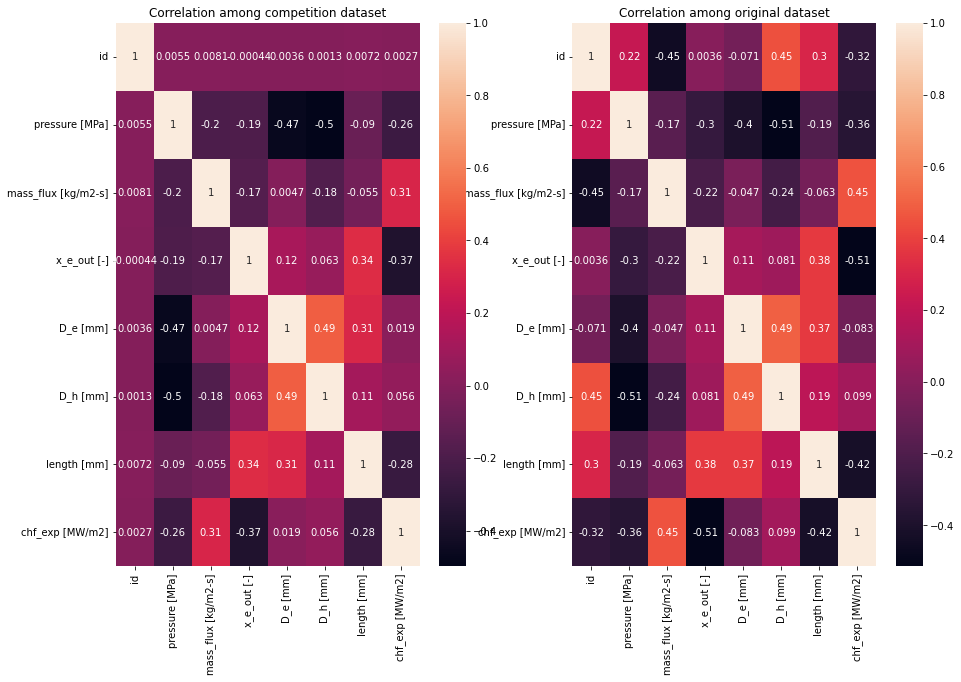

In [12]:
fig , axes = plt.subplots(1 , 2 , figsize = (15,10))
sns.heatmap(ax = axes[0],data = data.corr(),annot=True).set_title('Correlation among competition dataset')
sns.heatmap(ax = axes[1],data = original.corr(), annot=True).set_title('Correlation among original dataset')

Text(0.5, 1.0, 'Scatterlplot of competition dataset')

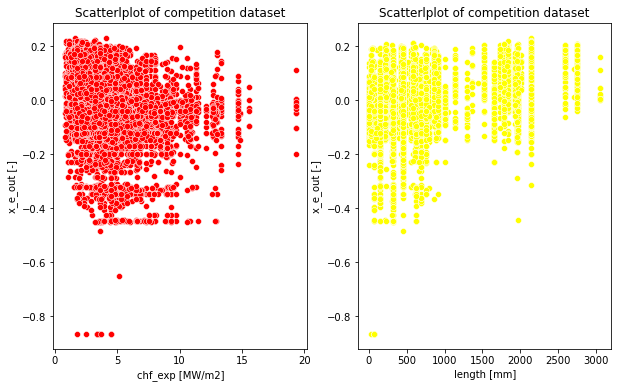

In [13]:
fig,axes = plt.subplots(1,2 , figsize = (10,6))
sns.scatterplot(ax = axes [0] , data = data , x = 'chf_exp [MW/m2]', y = 'x_e_out [-]',color = 'red').set_title('Scatterlplot of competition dataset')
sns.scatterplot(ax = axes[1] , data = data , x = 'length [mm]' ,  y = 'x_e_out [-]' ,color = 'yellow').set_title('Scatterlplot of competition dataset')

Text(0.5, 1.0, 'Scatterlplot of original dataset')

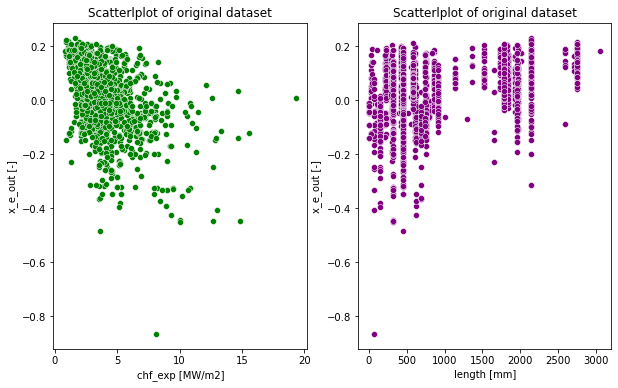

In [14]:
fig,axes = plt.subplots(1,2 , figsize = (10,6))
sns.scatterplot(ax = axes [0] , data = original , x = 'chf_exp [MW/m2]', y = 'x_e_out [-]',color = 'green').set_title('Scatterlplot of original dataset')
sns.scatterplot(ax = axes[1] , data = original , x = 'length [mm]' ,  y = 'x_e_out [-]' ,color = 'purple').set_title('Scatterlplot of original dataset')

Text(0.5, 1.0, 'Boxplot of original dataset ')

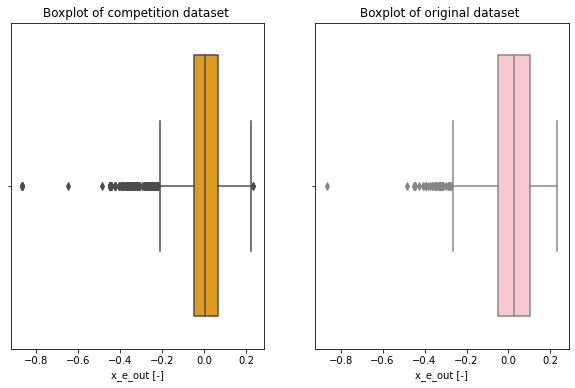

In [15]:
fig,axes = plt.subplots(1,2 , figsize = (10,6))
sns.boxplot(ax = axes[0] , data = data , x = 'x_e_out [-]',color = 'orange').set_title('Boxplot of competition dataset ')
sns.boxplot(ax = axes[1] , data = original , x = 'x_e_out [-]',color = 'pink').set_title('Boxplot of original dataset ')

In [11]:
dataframe.isna().sum()

pressure [MPa]          4452
mass_flux [kg/m2-s]     4791
x_e_out [-]            10415
D_e [mm]                5488
D_h [mm]                4589
length [mm]             4759
chf_exp [MW/m2]            0
dtype: int64

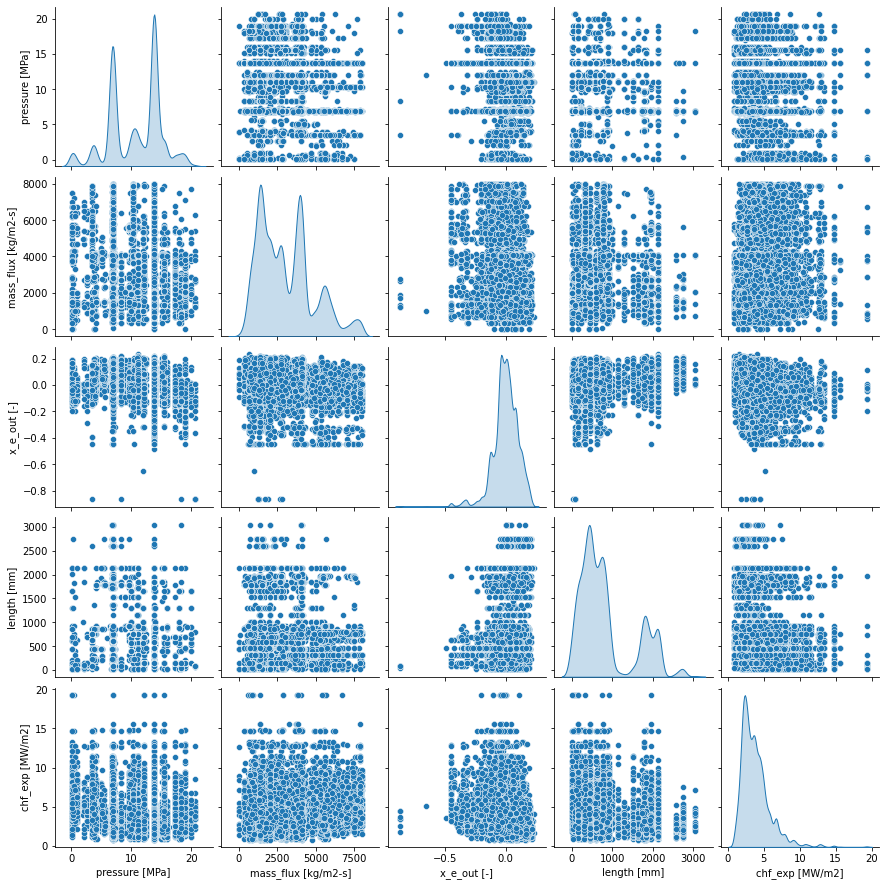

In [17]:
sns.pairplot(data=dataframe, diag_kind='kde')
plt.show()

### Fill the missing value
- Using Simple Imputer

In [12]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(dataframe)

SimpleImputer()

In [13]:
dataframe.isna().sum()

pressure [MPa]          4452
mass_flux [kg/m2-s]     4791
x_e_out [-]            10415
D_e [mm]                5488
D_h [mm]                4589
length [mm]             4759
chf_exp [MW/m2]            0
dtype: int64

In [14]:
dataframe = dataframe.fillna(dataframe.mean())

In [15]:
dataframe.isna().sum()

pressure [MPa]         0
mass_flux [kg/m2-s]    0
x_e_out [-]            0
D_e [mm]               0
D_h [mm]               0
length [mm]            0
chf_exp [MW/m2]        0
dtype: int64

### Split the data into training and testing in order to avoid data leakage

In [16]:
X = dataframe.drop('x_e_out [-]', axis = 1)
y = dataframe[['x_e_out [-]']]

In [17]:
X.isna().sum()

pressure [MPa]         0
mass_flux [kg/m2-s]    0
D_e [mm]               0
D_h [mm]               0
length [mm]            0
chf_exp [MW/m2]        0
dtype: int64

### Split the data into training and testing

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.6,random_state= 42)
print("train data size:",X_train.shape)
print("test data size:",X_test.shape)

train data size: (18986, 6)
test data size: (12658, 6)


### Build a Evaluation function

In [19]:
from sklearn.metrics import  mean_absolute_error , r2_score

def rmsle(y_test , y_preds):
    return np.sqrt(mean_squared_log_error(y_test , y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train , train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Test R^2": r2_score(y_test, test_preds)}
    return scores

### Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [21]:
model.fit(X_train, y_train)

C:\Users\MEEMAN~1\AppData\Local\Temp/ipykernel_10308/180087699.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [22]:
pred_1 = model.predict(X_test)

In [23]:
show_scores(model)

{'Training MAE': 0.030777234241361983,
 'Test MAE': 0.051085299829071,
 'Training R^2': 0.7119373883687179,
 'Test R^2': 0.25139901843720347}

In [201]:
df = pd.DataFrame({'id': submission['id'], 'x_e_out [-]':pred_1[:10415]})
df.to_csv('submission_rf.csv',index= False)

## Hyperparameter Tuning with Randomised Search CV

In [24]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth":[None , 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5 , 1 , "sqrt" , "auto"],
           "max_samples": [1000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\Meemansha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Meemansha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Meemansha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Meemansha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A co

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [25]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 18,
 'min_samples_leaf': 11,
 'max_samples': 1000,
 'max_features': 0.5,
 'max_depth': 10}

### Train the model using best paraams

In [26]:
ideal_model = RandomForestRegressor(n_estimators= 40,
                                    min_samples_split= 6,
                                    min_samples_leaf= 15,
                                    max_samples=1000,
                                    max_features= 'auto',
                                    max_depth= 10,
                                    n_jobs=-1,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)


C:\Users\MEEMAN~1\AppData\Local\Temp/ipykernel_10308/2142055953.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ideal_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, max_samples=1000, min_samples_leaf=15,
                      min_samples_split=6, n_estimators=40, n_jobs=-1,
                      random_state=42)

In [27]:
### predict the test data
preds_2 = ideal_model.predict(X_test)

In [28]:
preds_2

array([ 0.00607144, -0.02388584,  0.01299778, ..., -0.00747377,
       -0.0559595 , -0.00991027])

In [29]:
show_scores(ideal_model)

{'Training MAE': 0.04812624482291812,
 'Test MAE': 0.049253933375850094,
 'Training R^2': 0.2727863911120776,
 'Test R^2': 0.27750568065823256}

### AS WE CAN SE THE BEST MODEL IS THE INITAL MODEL WHEN IT COMES O TRAINING SET

### Feature Importance

In [30]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

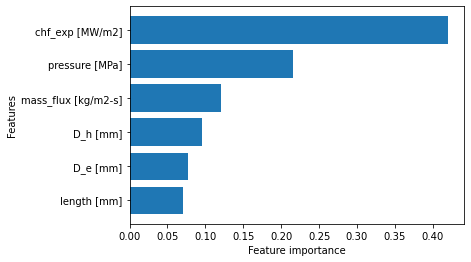

In [64]:
plot_features(X_train.columns, ideal_model.feature_importances_)

## Lasso Regression

In [31]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.05)
reg.fit(X_train,y_train)
pred_2 = reg.predict(X_test)

In [32]:
show_scores(reg)

{'Training MAE': 0.051694921164153265,
 'Test MAE': 0.05297707219585342,
 'Training R^2': 0.0738454762324765,
 'Test R^2': 0.08353030675503603}

## Catboost Regressor

In [33]:
!pip install catboost

In [34]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

In [35]:
model_CBR = CatBoostRegressor()

## Hyperparameter tuning using Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {'iterations': [10, 15, 20],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

grid_model = GridSearchCV(estimator = model_CBR,
                          param_grid = grid_params,
                          cv = 2 ,
                          n_jobs = -1,
                          verbose = True)
                                
                              
grid_model.fit(X_train, y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


In [137]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid_model.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_model.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_model.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 -9567.633859023637

 The best parameters across ALL searched params:
 {'depth': 2, 'iterations': 10, 'l2_leaf_reg': 3, 'learning_rate': 0.03}


In [138]:
show_scores(grid_model)

{'Training MAE': 0.9047646553014314,
 'Test MAE': 0.8610484422142396,
 'Training R^2': 0.06805648899516825,
 'Test R^2': 0.07439456129262889}

### Train model using best params

In [55]:
ideal_model_CBR = CatBoostRegressor(depth = 2,
                             iterations = 10,
                             l2_leaf_reg = 3,
                             learning_rate = 0.03)
ideal_model_CBR.fit(X_train,y_train)

0:	learn: 1.5139972	total: 90.8ms	remaining: 817ms
1:	learn: 1.5076267	total: 100ms	remaining: 400ms
2:	learn: 1.5018018	total: 105ms	remaining: 244ms
3:	learn: 1.4961982	total: 109ms	remaining: 163ms
4:	learn: 1.4912709	total: 113ms	remaining: 113ms
5:	learn: 1.4861535	total: 116ms	remaining: 77.4ms
6:	learn: 1.4810919	total: 119ms	remaining: 51ms
7:	learn: 1.4768851	total: 122ms	remaining: 30.5ms
8:	learn: 1.4721997	total: 125ms	remaining: 13.9ms
9:	learn: 1.4680411	total: 127ms	remaining: 0us


In [56]:
pred_3 = ideal_model_CBR.predict(X_test)
show_scores(ideal_model_CBR)

{'Training MAE': 0.9047646553014314,
 'Test MAE': 0.8610484422142396,
 'Training R^2': 0.06805648899516825,
 'Test R^2': 0.07439456129262889}

### Feature Importance

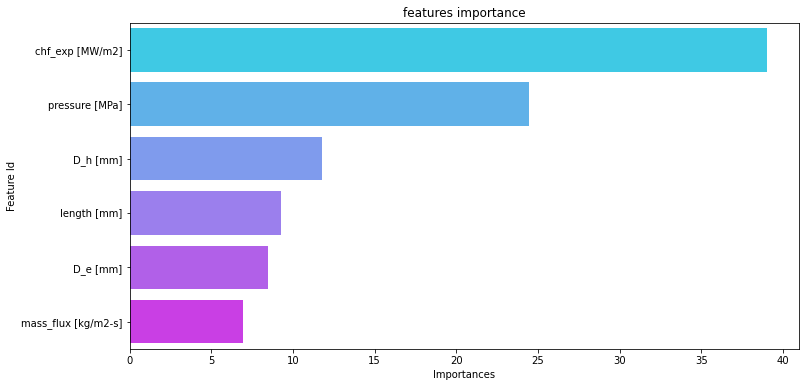

In [220]:
df_feature_importance = pd.DataFrame(ideal_model_CBR.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');

## Use Light GBM 

In [39]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [139]:
import lightgbm as lgb

In [140]:
from lightgbm import LGBMRegressor

In [141]:
model_lgb = LGBMRegressor()

In [142]:
lgb_param = {
    'num_leaves': [31],
    'feature_fraction': [0.5],
    'bagging_fraction': [0.5],
    'bagging_freq': [20],
    'learning_rate':[0.05]
    }


In [143]:
lgb_grid = GridSearchCV(estimator = model_lgb,
                          param_grid = lgb_param,
                          cv = 2 ,
                          n_jobs = -1,
                          verbose = True)
                                
                              
lgb_grid.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


C:\Users\Meemansha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=20, subsample_freq=0 will be ignored. Current value: bagging_freq=20


GridSearchCV(cv=2, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'bagging_fraction': [0.5], 'bagging_freq': [20],
                         'feature_fraction': [0.5], 'learning_rate': [0.05],
                         'num_leaves': [31]},
             verbose=True)

In [144]:
model_lgb.fit(X_train,y_train)

C:\Users\Meemansha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMRegressor()

In [145]:
pred_4 = model_lgb.predict(X_test)

In [70]:
pred_4

array([ 0.28770419, -0.28964025,  0.28813748, ...,  0.01576689,
       -0.65010034, -0.25885827])

In [146]:
show_scores(model_lgb)

{'Training MAE': 0.8411496990607819,
 'Test MAE': 0.8423454115100591,
 'Training R^2': 0.3886645516694379,
 'Test R^2': 0.29450174893813497}

In [79]:
data.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


In [82]:
df = pd.DataFrame({'id': data['id'].iloc[:10415], 'x_e_out [-]':pred_4[:10415]})
#df.to_csv('submission.csv',index= False)

In [84]:
df.shape

(10415, 2)

Text(0.5, 1.0, 'Prdicted data')

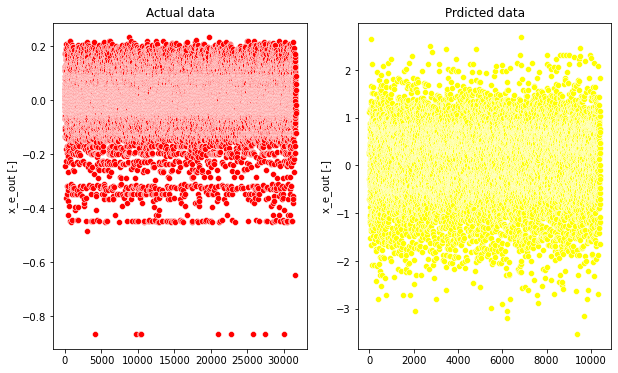

In [90]:
fig , axes = plt.subplots(1, 2 , figsize = (10,6))
sns.scatterplot(ax = axes[0],data = dataframe['x_e_out [-]'], color = 'red').set_title('Actual data')
sns.scatterplot(ax = axes[1],data = df['x_e_out [-]'],color = 'yellow').set_title('Prdicted data')

Text(0.5, 1.0, 'Prdicted data')

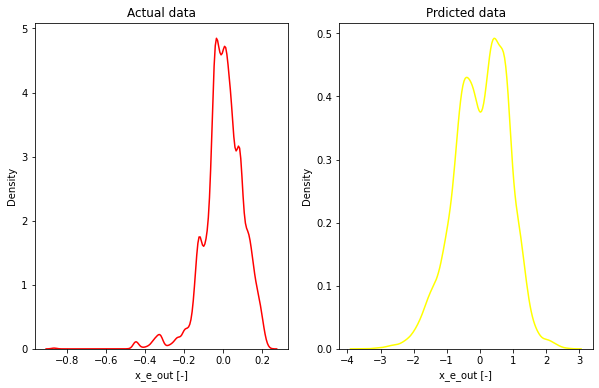

In [91]:
fig , axes = plt.subplots(1, 2 , figsize = (10,6))
sns.kdeplot(ax = axes[0],data = dataframe['x_e_out [-]'], color = 'red').set_title('Actual data')
sns.kdeplot(ax = axes[1],data = df['x_e_out [-]'],color = 'yellow').set_title('Prdicted data')

## Tensorflow Regression 

In [147]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [148]:
X_train.shape ,X_test.shape , y_train.shape , y_test.shape

((18986, 6), (12658, 6), (18986, 1), (12658, 1))

In [149]:
tf.random.set_seed(42)  #first we set random seed
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_5.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['mae'])
history = model_5.fit( X_train, y_train, epochs = 10)

Epoch 1/10
594/594 [==============================] - 4s 2ms/step - loss: 0.9160 - mae: 0.9160
Epoch 2/10
594/594 [==============================] - 1s 2ms/step - loss: 0.9092 - mae: 0.9092
Epoch 3/10
594/594 [==============================] - 1s 2ms/step - loss: 0.9075 - mae: 0.9075
Epoch 4/10
594/594 [==============================] - 1s 2ms/step - loss: 0.9076 - mae: 0.9076
Epoch 5/10
594/594 [==============================] - 1s 2ms/step - loss: 0.9056 - mae: 0.9056
Epoch 6/10
594/594 [==============================] - 1s 2ms/step - loss: 0.9051 - mae: 0.9051
Epoch 7/10
594/594 [==============================] - 1s 2ms/step - loss: 0.9047 - mae: 0.9047
Epoch 8/10
594/594 [==============================] - 1s 2ms/step - loss: 0.9043 - mae: 0.9043
Epoch 9/10
594/594 [==============================] - 1s 2ms/step - loss: 0.9044 - mae: 0.9044
Epoch 10/10
594/594 [==============================] - 1s 2ms/step - loss: 0.9032 - mae: 0.9032


In [150]:
model_5.evaluate(X_test,y_test)

396/396 [==============================] - 1s 1ms/step - loss: 0.8536 - mae: 0.8536


[0.8536266684532166, 0.8536266684532166]

Text(0.5, 0, 'epochs')

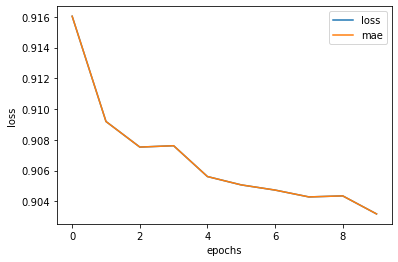

In [151]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [97]:
y_pred = model_5.predict(X_test)

396/396 [==============================] - 1s 1ms/step
